<a href="https://colab.research.google.com/github/goliharini19/DATA-MINING/blob/main/Lab06_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
#create a synthetic dataset
np.random.seed(42)
data=np.random.normal(0,1,100)#Normal distribution
outliers=np.random.normal(5,10,5)#Artificial outliers

In [ ]:
data_series=pd.Series(data)
data_series.describe()

,0
count,100.000000
mean,-0.103847
std,0.908168
min,-2.619745
25%,-0.600906
50%,-0.126956
75%,0.405952
max,1.852278


In [ ]:
#combine data and outliers into a single variable
data_with_outliers=np.concatenate([data,outliers])
#convert to DataFrame
df=pd.DataFrame(data_with_outliers,columns=['values'])

In [ ]:
#step 1: detect outliers using IQR method
Q1 = df['values'].quantile(0.25)
Q3 = df['values'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identifying outliers based on IQR
outliers_iqr = df[(df['values'] < lower_bound) | (df['values'] >
upper_bound)]

In [ ]:
#print the values of upper and lower bounds
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

Lower Bound: -2.2741676802435267
Upper Bound: 2.185728501127486


In [ ]:
# Identifying outliers based on IQR
outliers_iqr = df[(df['values'] < lower_bound) | (df['values'] >
upper_bound)]

In [ ]:
# Step 2: Detect Outliers using Z-Score method
z_scores = stats.zscore(df['values'])
outliers_zscore = df[np.abs(z_scores) > 3]

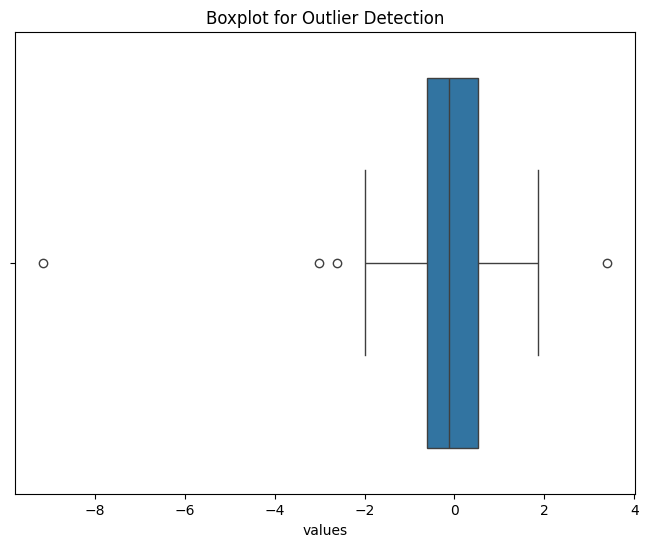

In [ ]:
# Step 3: Visualize outliers using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['values'])
plt.title("Boxplot for Outlier Detection")
plt.show()

In [ ]:
# Step 4: Handle Outliers
# Capping: Set outliers to the upper and lower bounds
df_capped = df.copy()
df_capped['values'] = np.clip(df_capped['values'], lower_bound, upper_bound)
# Removal: Drop rows with outliers
df_removed = df.copy()
df_removed = df_removed[(df_removed['values'] >= lower_bound) &
(df_removed['values'] <= upper_bound)]
# Imputation: Replace outliers with the median
df_imputed = df.copy()
median_value = df['values'].median()
df_imputed['values'] = np.where((df_imputed['values'] < lower_bound) |
(df_imputed['values'] > upper_bound), median_value, df_imputed['values'])

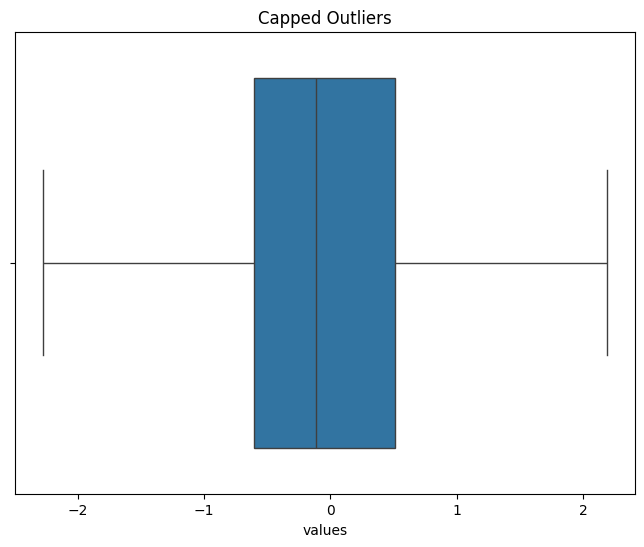

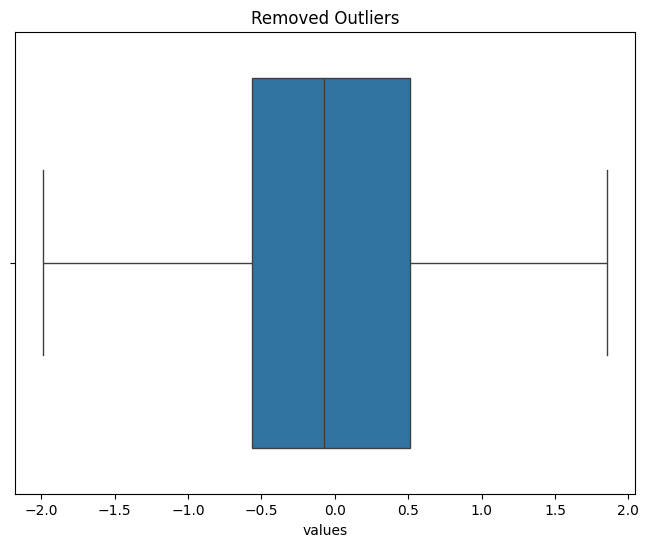

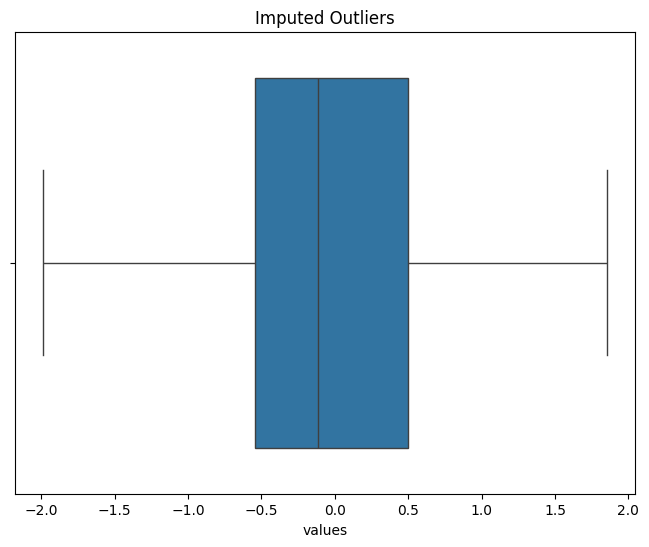

In [ ]:
# Step 5: Visualize handled data
# Capped data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_capped['values'])
plt.title("Capped Outliers")
plt.show()
# Removed data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_removed['values'])
plt.title("Removed Outliers")
plt.show()
# Imputed data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_imputed['values'])
plt.title("Imputed Outliers")
plt.show()

In [ ]:
# Print outliers detected
print(f"Outliers detected using IQR:\n{outliers_iqr}")
print(f"Outliers detected using Z-Score:\n{outliers_zscore}")

Outliers detected using IQR:
       values
74  -2.619745
100 -9.153707
103 -3.022773
104  3.387143
Outliers detected using Z-Score:
       values
100 -9.153707
